In [2]:
% matplotlib inline

In [3]:
bumgarner = 'data/518516_data.csv'
myers = 'data/571976_data.csv'
# All events for Cespedes have EV greater than 100 MPH
cespedes = 'data/493316_data.csv'
                
pitch_map = {
    'AB': 'Automatic Ball',
    'AS': 'Automatic Strike',
    'CH': 'Changeup',
    'CU': 'Curveball',
    'EP': 'Eephus',
    'FC': 'Cutter',
    'FF': 'Four-Seam Fastball',
    'FO': 'Forkball',
    'FS': 'Splitter',
    'FT': 'Two-Seam Fastball (synonymous with SI)',
    'GY': 'Gyroball',
    'IN': 'Intentional Ball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'NP': 'No Pitch',
    'PO': 'Pitchout',
    'SC': 'Screwball',
    'SI': 'Sinker (synonymous with FT)',
    'SL': 'Slider',
    'UN': 'Unknown',
}

In [4]:
import pandas


bumgarner_df = pandas.read_csv(bumgarner)

max_columns = len(bumgarner_df.columns)
pandas.set_option('display.max_columns', max_columns)

bumgarner_df.head(20)

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,px,pz,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,Foul,154.416,2473.276,-31.6,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,0,0,2017,5.608527580831176,11.713549371890377,0.989798884519417,2.34816111900747,null,null,518934,1,1,top,0.0,0.0,21748,2017-04-14T02:17:48Z,543148,490319,170414_021758,-6.13,-130.425696597848,-6.05,9.60,28.98,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,Ball,143.057,2453.821,-37.1,4.1,11,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,0,1,2017,7.532488885134348,10.016434231405896,-0.904005500695258,3.80175935306106,null,null,518934,1,1,top,0.0,0.0,21811,2017-04-14T02:18:11Z,543148,490319,170414_021816,-11.50,-133.916273260745,-2.23,13.61,30.21,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,Ball,151.986,2658.577,-39.5,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,1,1,2017,6.456318245159377,12.134636186149319,1.66631311250461,1.73931706551597,null,null,518934,1,1,top,0.0,0.0,21832,2017-04-14T02:18:32Z,543148,490319,170414_021837,-5.12,-131.636612579712,-7.59,11.33,27.90,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232
3,SL,17,2017-04-13,86.62,2.5552190961025,5.53683207905381,Madison Bumgarner,571448,518516,Walk,Swinging Strike,178.053,1569.989,3.6,5.0,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,2,1,2017,0.2876370336922488,8.453697412580675,-1.24155406631403,1.61655798713749,null,null,518934,1,1,top,0.0,0.0,21852,2017-04-14T02:18:52Z,543148,490319,170414_021858,-9.53,-125.523344744772,-6.00,0.46,23.85,-18.60,3.47,1.59,null,null,null,86.25,2235,6.14,490232
4,CU,18,2017-04-13,79.79,2.4994766921678,5.51427932173449,Madison Bumgarner,571448,518516,Walk,Ball In Dirt,322.545,778.675,8.0,11.4,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,2,2,2017,-2.795502275372724,3.6488558163534845,-2.07018292270486,1.00500838217019,null,null,518934,1,1,top,0.0,0.0,21921,2017-04-14T02:19:21Z,543148,490319,170414_021926,-9.59,-115.611568050798,-2.15,-3.77,22.08,-37.10,3.47,1.59,null,null,null,78.62,2513,5.76,490232
5,FF,19,2017-04-13,91.35,2.63072781737248,5.82277367223198,Madison Bumgarner,571448,518516,Walk,Ball,157.393,2271.164,-25.5,3.3,12,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,3,2,2017,4.539030789954408,10.899840239765028,0.137934618666434,5.35338250751139,null,null,518934,1,1,top,0.0,0.0,21950,2017-04-14T02:19:50Z,543148,490319,170414_021955,-8.02,-132.485294231464,1.28,7.97,31.39,-13.03,3.47,1.59,null,null,null,91.54,2144,6.83,490232
6,FF,24,2017-04-13,92.03,2.25640765467802,5.65274936135248,Madison Bumgarner,471865,518516,Strikeout,Ball,149.481,2378.227,-31.4,3.7,11,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,B,0,0,0,0,2017,6.192573849944509,10.504440776599356,-1.43419957194841,3.77979417135055,null,518934,571448,1,1,top,0.0,0.0,22031,2017-04-14T02:20:31Z,543148,490319,170414_022036,-11.81,-133.285079258402,-2.38,11.10,29.70,-13.35,3.41,1.57,null,null,null,92.23,2237,6.75,490232
7,FF,25,2017-04-13,91.60,2.71882574186996,5.70512856189843,Madison Bumgarner,471865,518516,Strikeout,Swinging Strike,145.725,2749.674,-45.2,3.9,12,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,S,0,0,1,0,2017,7.968456064491804,11.691775527106309,0.363499937053344,3.58402894545356,null,518934,

In [5]:
# Drop null rows
bumgarner_df = bumgarner_df[bumgarner_df['pitch_type'] != 'null']

In [6]:
ff_df = bumgarner_df[bumgarner_df['pitch_type'] == 'FF']
ff_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,px,pz,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,Foul,154.416,2473.276,-31.6,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,0,0,2017,5.608527580831176,11.713549371890377,0.989798884519417,2.34816111900747,null,null,518934,1,1,top,0.0,0.0,21748,2017-04-14T02:17:48Z,543148,490319,170414_021758,-6.13,-130.425696597848,-6.05,9.60,28.98,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,Ball,143.057,2453.821,-37.1,4.1,11,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,0,1,2017,7.532488885134348,10.016434231405896,-0.904005500695258,3.80175935306106,null,null,518934,1,1,top,0.0,0.0,21811,2017-04-14T02:18:11Z,543148,490319,170414_021816,-11.50,-133.916273260745,-2.23,13.61,30.21,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,Ball,151.986,2658.577,-39.5,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,1,1,2017,6.456318245159377,12.134636186149319,1.66631311250461,1.73931706551597,null,null,518934,1,1,top,0.0,0.0,21832,2017-04-14T02:18:32Z,543148,490319,170414_021837,-5.12,-131.636612579712,-7.59,11.33,27.90,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232
5,FF,19,2017-04-13,91.35,2.63072781737248,5.82277367223198,Madison Bumgarner,571448,518516,Walk,Ball,157.393,2271.164,-25.5,3.3,12,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,3,2,2017,4.539030789954408,10.899840239765028,0.137934618666434,5.35338250751139,null,null,518934,1,1,top,0.0,0.0,21950,2017-04-14T02:19:50Z,543148,490319,170414_021955,-8.02,-132.485294231464,1.28,7.97,31.39,-13.03,3.47,1.59,null,null,null,91.54,2144,6.83,490232
6,FF,24,2017-04-13,92.03,2.25640765467802,5.65274936135248,Madison Bumgarner,471865,518516,Strikeout,Ball,149.481,2378.227,-31.4,3.7,11,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,B,0,0,0,0,2017,6.192573849944509,10.504440776599356,-1.43419957194841,3.77979417135055,null,518934,571448,1,1,top,0.0,0.0,22031,2017-04-14T02:20:31Z,543148,490319,170414_022036,-11.81,-133.285079258402,-2.38,11.10,29.70,-13.35,3.41,1.57,null,null,null,92.23,2237,6.75,490232


/Users/rlucioni/.pyenv/versions/3.6.1/envs/statcast/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


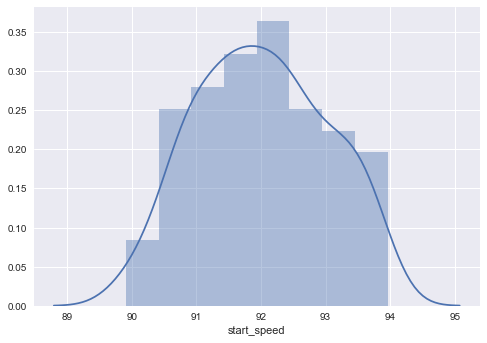

In [7]:
import seaborn


seaborn.distplot(ff_df['start_speed'].astype(float))

In [8]:
bumgarner_df['pitch_name'] = [pitch_map[pitch] for pitch in bumgarner_df['pitch_type']]

for key in ['start_speed', 'spin_rate']:
    bumgarner_df[key] = bumgarner_df[key].astype(float)

bumgarner_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,...,pz,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitch_name
0,FF,14,2017-04-13,89.93,2.64864384795279,5.62297484868821,Madison Bumgarner,571448,518516,Walk,Foul,154.416,2473.276,-31.6,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,0,0,2017,5.608527580831176,11.713549371890377,...,2.34816111900747,null,null,518934,1,1,top,0.0,0.0,21748,2017-04-14T02:17:48Z,543148,490319,170414_021758,-6.13,-130.425696597848,-6.05,9.60,28.98,-12.12,3.47,1.59,null,null,null,89.64,2270,6.42,490232,Four-Seam Fastball
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,Ball,143.057,2453.821,-37.1,4.1,11,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,0,1,2017,7.532488885134348,10.016434231405896,...,3.80175935306106,null,null,518934,1,1,top,0.0,0.0,21811,2017-04-14T02:18:11Z,543148,490319,170414_021816,-11.50,-133.916273260745,-2.23,13.61,30.21,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232,Four-Seam Fastball
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,Ball,151.986,2658.577,-39.5,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,1,1,2017,6.456318245159377,12.134636186149319,...,1.73931706551597,null,null,518934,1,1,top,0.0,0.0,21832,2017-04-14T02:18:32Z,543148,490319,170414_021837,-5.12,-131.636612579712,-7.59,11.33,27.90,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232,Four-Seam Fastball
3,SL,17,2017-04-13,86.62,2.5552190961025,5.53683207905381,Madison Bumgarner,571448,518516,Walk,Swinging Strike,178.053,1569.989,3.6,5.0,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,2,1,2017,0.2876370336922488,8.453697412580675,...,1.61655798713749,null,null,518934,1,1,top,0.0,0.0,21852,2017-04-14T02:18:52Z,543148,490319,170414_021858,-9.53,-125.523344744772,-6.00,0.46,23.85,-18.60,3.47,1.59,null,null,null,86.25,2235,6.14,490232,Slider
4,CU,18,2017-04-13,79.79,2.4994766921678,5.51427932173449,Madison Bumgarner,571448,518516,Walk,Ball In Dirt,322.545,778.675,8.0,11.4,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,2,2,2017,-2.795502275372724,3.6488558163534845,...,1.00500838217019,null,null,518934,1,1,top,0.0,0.0,21921,2017-04-14T02:19:21Z,543148,490319,170414_021926,-9.59,-115.611568050798,-2.15,-3.77,22.08,-37.10,3.47,1.59,null,null,null,78.62,2513,5.76,490232,Curveball


In [9]:
import numpy


bumgarner_df['count'] = [1]*len(bumgarner_df)

pitch_df = bumgarner_df.groupby('pitch_type').agg({
    'count': len,
    'start_speed': [numpy.mean, numpy.std],
    'spin_rate': [numpy.mean, numpy.std],
})

pitch_df

count start_speed              spin_rate            
             len        mean       std         mean         std
pitch_type                                                     
CH            17   83.961176  0.843059  1543.555882  349.091146
CU            55   77.937273  1.094093  1296.894382  431.104902
FC             2   92.955000  0.346482  2018.612500  100.479166
FF           141   92.016879  1.005133  2127.634156  448.203468
FT             2   92.820000  0.098995  1575.800500  185.664320
SL            83   87.690723  1.246237  1318.514916  379.827741

<Container object of 6 artists>

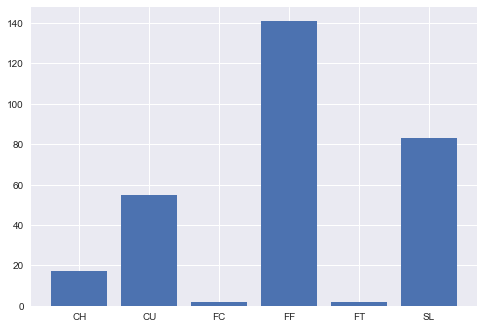

In [10]:
from matplotlib import pyplot

xs = range(len(pitch_df))
counts = pitch_df[('count', 'len')]

pyplot.bar(xs, counts, tick_label=pitch_df.index)

<Container object of 6 artists>

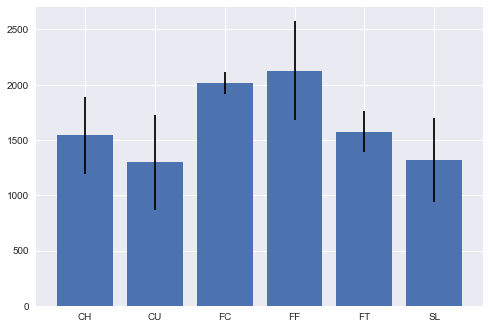

In [11]:
spin_rate_means = pitch_df[('spin_rate', 'mean')]
spin_rate_stds = pitch_df[('spin_rate', 'std')]

pyplot.bar(xs, spin_rate_means, yerr=spin_rate_stds, tick_label=pitch_df.index)

In [12]:
strike_df = bumgarner_df[bumgarner_df['description'].str.contains('strike', case=False)]
strike_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,...,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitch_name,count
3,SL,17,2017-04-13,86.62,2.5552190961025,5.53683207905381,Madison Bumgarner,571448,518516,Walk,Swinging Strike,178.053,1569.989,3.6,5.0,13,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,S,0,0,2,1,2017,0.2876370336922488,8.453697412580675,...,null,null,518934,1,1,top,0.0,0.0,21852,2017-04-14T02:18:52Z,543148,490319,170414_021858,-9.53,-125.523344744772,-6.00,0.46,23.85,-18.60,3.47,1.59,null,null,null,86.25,2235,6.14,490232,Slider,1
7,FF,25,2017-04-13,91.60,2.71882574186996,5.70512856189843,Madison Bumgarner,471865,518516,Strikeout,Swinging Strike,145.725,2749.674,-45.2,3.9,12,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,S,0,0,1,0,2017,7.968456064491804,11.691775527106309,...,null,518934,571448,1,1,top,0.0,0.0,22051,2017-04-14T02:20:51Z,543148,490319,170414_022056,-8.87,-132.856311343976,-3.38,14.18,29.60,-11.37,3.41,1.57,null,null,null,91.91,2138,6.74,490232,Four-Seam Fastball,1
10,CU,31,2017-04-13,78.93,2.56814918046067,5.64678943541601,Madison Bumgarner,471865,518516,Strikeout,Swinging Strike,285.653,720.763,11.3,10.6,13,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,S,0,0,1,2,2017,-4.129142280197364,1.1569173000339132,...,518934,null,571448,1,1,top,0.0,0.0,22238,2017-04-14T02:22:38Z,543148,490319,170414_022243,-8.54,-114.519239724239,-2.38,-5.48,21.33,-33.71,3.41,1.57,null,null,null,78.51,2597,6.17,490232,Curveball,1
15,FF,70,2017-04-13,92.40,2.41463474903135,5.57137965928257,Madison Bumgarner,596115,518516,Strikeout,Swinging Strike,147.904,2601.848,-39.5,3.8,5,Trevor Story strikes out swinging.,R,R,L,SF,COL,S,0,0,2,2,2017,7.0682303837510165,11.269146411823392,...,null,null,null,0,2,top,0.0,0.0,23410,2017-04-14T02:34:10Z,543148,490319,170414_023415,-8.94,-133.934666499324,-5.46,12.76,30.53,-11.83,3.41,1.57,null,null,null,92.55,2208,6.71,490232,Four-Seam Fastball,1
16,FF,80,2017-04-13,91.62,2.3337355768706,5.6956863776246,Madison Bumgarner,572863,518516,Strikeout,Called Strike,150.795,2547.962,-35.8,3.6,11,Dustin Garneau called out on strikes.,R,R,L,SF,COL,S,0,0,0,0,2017,6.3797066741528035,11.412166254937187,...,null,null,null,2,2,top,0.0,0.0,23614,2017-04-14T02:36:14Z,543148,490319,170414_023620,-10.40,-132.734904980007,-4.19,11.38,28.57,-11.83,3.37,1.54,null,null,null,91.54,2213,6.49,490232,Four-Seam Fastball,1


In [13]:
len(strike_df)/len(bumgarner_df)

0.28

In [14]:
ball_df = bumgarner_df[bumgarner_df['description'].str.contains('ball$', case=False)]
ball_df.head()

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,...,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitch_name,count
1,FF,15,2017-04-13,92.46,2.47657616723997,5.65926433476207,Madison Bumgarner,571448,518516,Walk,Ball,143.057,2453.821,-37.1,4.1,11,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,0,1,2017,7.532488885134348,10.016434231405896,...,null,null,518934,1,1,top,0.0,0.0,21811,2017-04-14T02:18:11Z,543148,490319,170414_021816,-11.50,-133.916273260745,-2.23,13.61,30.21,-14.07,3.47,1.59,null,null,null,92.55,2275,6.69,490232,Four-Seam Fastball,1
2,FF,16,2017-04-13,90.74,2.79717512361075,5.46312639995038,Madison Bumgarner,571448,518516,Walk,Ball,151.986,2658.577,-39.5,3.7,14,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,1,1,2017,6.456318245159377,12.134636186149319,...,null,null,518934,1,1,top,0.0,0.0,21832,2017-04-14T02:18:32Z,543148,490319,170414_021837,-5.12,-131.636612579712,-7.59,11.33,27.90,-10.88,3.47,1.59,null,null,null,90.58,2173,6.35,490232,Four-Seam Fastball,1
5,FF,19,2017-04-13,91.35,2.63072781737248,5.82277367223198,Madison Bumgarner,571448,518516,Walk,Ball,157.393,2271.164,-25.5,3.3,12,Nolan Arenado walks. DJ LeMahieu to 2nd.,R,R,L,SF,COL,B,0,0,3,2,2017,4.539030789954408,10.899840239765028,...,null,null,518934,1,1,top,0.0,0.0,21950,2017-04-14T02:19:50Z,543148,490319,170414_021955,-8.02,-132.485294231464,1.28,7.97,31.39,-13.03,3.47,1.59,null,null,null,91.54,2144,6.83,490232,Four-Seam Fastball,1
6,FF,24,2017-04-13,92.03,2.25640765467802,5.65274936135248,Madison Bumgarner,471865,518516,Strikeout,Ball,149.481,2378.227,-31.4,3.7,11,Carlos Gonzalez strikes out swinging.,R,L,L,SF,COL,B,0,0,0,0,2017,6.192573849944509,10.504440776599356,...,null,518934,571448,1,1,top,0.0,0.0,22031,2017-04-14T02:20:31Z,543148,490319,170414_022036,-11.81,-133.285079258402,-2.38,11.10,29.70,-13.35,3.41,1.57,null,null,null,92.23,2237,6.75,490232,Four-Seam Fastball,1
11,FF,66,2017-04-13,91.16,2.38703513124298,5.55628138749718,Madison Bumgarner,596115,518516,Strikeout,Ball,143.009,3128.691,-51.2,4.4,13,Trevor Story strikes out swinging.,R,R,L,SF,COL,B,0,0,0,0,2017,9.91318127842326,13.159042279397042,...,null,null,null,0,2,top,0.0,0.0,23253,2017-04-14T02:32:53Z,543148,490319,170414_023258,-10.25,-131.586799180946,-9.11,17.07,32.51,-9.51,3.41,1.57,null,null,null,89.82,2193,6.28,490232,Four-Seam Fastball,1


In [15]:
len(ball_df)/len(bumgarner_df)

0.2866666666666667

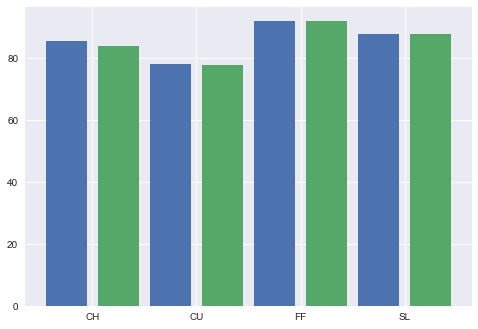

In [20]:
ax = pyplot.subplot(1, 1, 1)

aggregated_strike_df = strike_df.rename(columns={'start_speed': 'strike_start_speed'}).groupby('pitch_type').agg({
    'strike_start_speed': [numpy.mean, numpy.std],
})

aggregated_ball_df = ball_df.rename(columns={'start_speed': 'ball_start_speed'}).groupby('pitch_type').agg({
    'ball_start_speed': [numpy.mean, numpy.std],
})

strike_means = aggregated_strike_df[('strike_start_speed', 'mean')]
ball_means = aggregated_ball_df[('ball_start_speed', 'mean')]

strikes_and_balls = pandas.concat([strike_means, ball_means], axis=1, join='inner')

evens = numpy.arange(len(strikes_and_balls)) * 2
odds = (numpy.arange(len(strikes_and_balls)) * 2) + 1

pyplot.bar(evens, strikes_and_balls[('strike_start_speed', 'mean')])
pyplot.bar(odds, strikes_and_balls[('ball_start_speed', 'mean')])

ax.set_xticks((numpy.arange(len(strikes_and_balls)) * 2) + 0.5)
# Prevent return value from being printed.
_ = ax.set_xticklabels(strikes_and_balls.index)

In [24]:
cespedes_df = pandas.read_csv(cespedes)
cespedes_df.head(10)

,pitch_type,pitch_id,game_date,start_speed,x0,z0,player_name,batter,pitcher,events,description,spin_dir,spin_rate,break_angle,break_length,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,px,pz,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs,tfs_zulu,catcher,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,hit_speed,hit_angle,effective_speed,release_spin_rate,release_extension,game_pk
0,FF,298,2017-04-13,96.48,-1.279247,5.680119,Yoenis Cespedes,493316,570632,Home Run,"In play, run(s)",230.772,2350.523,40.8,5.1,1,Yoenis Cespedes homers (6) on a fly ball to le...,R,R,R,MIA,NYM,X,7,1,0,0,2017,-9.060712,7.396926,-0.293165,2.982568,null,null,null,0,5,top,22.52,59.05,3558,2017-04-14T00:35:58Z,454560,427220,170414_003559,5.90,-139.903873,-4.21,-17.56,32.55,-17.84,3.30,1.50,402,106.0,33.32,95.27,null,5.85,490236
1,FF,182,2017-04-13,92.39,1.405775,5.727429,Yoenis Cespedes,493316,612672,Home Run,"In play, run(s)",148.712,2294.568,-33.6,4.1,3,Yoenis Cespedes homers (5) on a fly ball to le...,R,R,L,MIA,NYM,X,7,1,2,2,2017,6.221634,10.237098,0.690291,2.783078,null,null,null,0,3,top,53.95,32.18,225,2017-04-14T00:02:25Z,454560,427220,170414_000226,-3.97,-134.055310,-5.11,11.01,30.66,-14.06,3.30,1.50,427,107.0,29.65,91.24,null,5.87,490236
2,FF,30,2017-04-11,90.66,-0.773613,5.724964,Yoenis Cespedes,493316,453329,Home Run,"In play, run(s)",196.866,2532.420,25.7,3.1,9,Yoenis Cespedes homers (2) on a fly ball to ce...,R,R,R,PHI,NYM,X,8,1,0,2,2017,-3.838714,12.660224,0.329919,2.062352,434158,452678,null,0,1,top,140.58,25.48,231822,2017-04-11T23:18:22Z,519237,427538,170411_231823,4.14,-131.475386,-7.50,-6.66,30.20,-10.21,3.41,1.57,411,105.2,25.68,90.27,2099,6.42,490211
3,SL,245,2017-04-11,85.25,2.249756,6.013094,Yoenis Cespedes,493316,605388,Home Run,"In play, run(s)",172.735,949.752,0.3,6.5,5,Yoenis Cespedes homers (3) on a fly ball to le...,R,R,L,PHI,NYM,X,7,1,2,2,2017,0.660894,5.182785,-0.215790,2.317164,null,null,null,0,4,top,7.00,73.32,2342,2017-04-12T00:23:42Z,519237,427538,170412_002343,-6.23,-123.655283,-4.08,1.02,24.50,-24.14,3.37,1.54,428,109.3,24.38,84.00,2645,5.63,490211
4,FF,357,2017-04-11,92.29,1.900180,5.602771,Yoenis Cespedes,493316,605388,Home Run,"In play, run(s)",128.944,2668.352,-44.3,5.6,5,Yoenis Cespedes homers (4) on a fly ball to le...,R,R,L,PHI,NYM,X,7,1,1,1,2017,10.573074,8.544538,0.008180,2.605771,null,null,null,2,5,top,29.03,68.66,5321,2017-04-12T00:53:21Z,519237,427538,170412_005323,-8.62,-133.805433,-4.75,19.14,29.26,-16.71,3.30,1.50,382,108.3,37.57,91.68,2334,6.15,490211
5,FT,517,2017-04-11,93.91,3.061009,5.005761,Yoenis Cespedes,493316,570257,Double,"In play, no out",99.073,2837.306,-39.2,8.1,14,Yoenis Cespedes doubles (2) on a sharp line dr...,R,R,L,PHI,NYM,X,8,3,0,1,2017,14.046860,2.243222,0.319963,1.266524,null,null,null,2,7,top,124.85,39.63,14544,2017-04-12T01:45:44Z,519237,427538,170412_014555,-12.24,-135.846295,-4.81,26.24,29.91,-27.98,3.37,1.54,377,111.0,13.31,92.60,2020,5.85,490211
6,FT,621,2017-04-08,93.42,-2.400931,5.469363,Yoenis Cespedes,493316,475479,Flyout,"In play, out(s)",217.742,2593.843,40.2,4.2,12,Yoenis Cespedes flies out sharply to center fi...,R,R,R,NYM,MIA,X,8,1,2,0,2017,-8.108891,10.475492,0.846185,2.732658,null,null,452678,2,8,bot,158.58,36.81,20616,2017-04-09T02:06:16Z,592663,427103,170409_020628,11.39,-134.987388,-4.79,-14.77,32.85,-13.09,3.37,1.54,391,100.7,29.16,91.59,2383,5.84,490170
7,FF,551,2017-04-07,90.62,-2.936777,5.640051,Yoenis Cespedes,493316,621295,Home Run,"In play, run(s)",225.165,1742.888,23.3,5.6,4,Yoenis Cespedes homers (1) on a fly ball to le...,R,R,R,NYM,MIA,X,7,1,3,1,2017,-6.413641,6.376706,-0.483623,2.434094,null,null,null,0,8,bot,0.00,0.00,15112,2017-04-08T01:51:12Z,454560,573596,170408_015124,8.52,-131.494989,-4.26,-11.20,28.51,-21.04,3.30,1.50,378,103.7,35.56,90.87,1763,6.64,490155
8,FF,585,2017-04-03,98.09,-2.580192,5.025572,Yoenis Cespedes,493316,542432,Flyout,"In pla

In [25]:
# TODO: Heatmap of TBs or slugging "percentage" against exit velocity (EV)
# and launch angle (LA), looking for the "barrel zone."
total_bases_map = {
    'Single': 1,
    'Double': 2,
    'Triple': 3,
    'Home Run': 4,
}